In [63]:
from prophet import Prophet
import pandas as pd

In [64]:
import codecs
with codecs.open("./data/nikkei_stock_average_monthly_jp.csv", "r", "Shift-JIS", "ignore") as file:
    df = pd.read_table(file, delimiter=",")
df.head()

,データ日付,終値,始値,高値,安値
0,2000/01/01,19539.70,19002.86,19539.70,18168.27
1,2000/02/01,19959.52,19423.38,20007.77,19367.83
2,2000/03/01,20337.32,20081.67,20706.65,19078.60
3,2000/04/01,17973.70,20726.99,20833.21,17973.70
4,2000/05/01,16332.45,18403.08,18439.36,16008.14


In [65]:
df = df.rename(columns={"データ日付":"date", "終値":"closing_price", "始値":"open_price", "高値":"higher_price", "安値":"lower_price"})
df = df[:-1]
print(len(df))
df.head()

267


,date,closing_price,open_price,higher_price,lower_price
0,2000/01/01,19539.70,19002.86,19539.70,18168.27
1,2000/02/01,19959.52,19423.38,20007.77,19367.83
2,2000/03/01,20337.32,20081.67,20706.65,19078.60
3,2000/04/01,17973.70,20726.99,20833.21,17973.70
4,2000/05/01,16332.45,18403.08,18439.36,16008.14


In [66]:
#日付の処理
df["date"] = pd.to_datetime(df["date"])
df.head()

,date,closing_price,open_price,higher_price,lower_price
0,2000-01-01,19539.70,19002.86,19539.70,18168.27
1,2000-02-01,19959.52,19423.38,20007.77,19367.83
2,2000-03-01,20337.32,20081.67,20706.65,19078.60
3,2000-04-01,17973.70,20726.99,20833.21,17973.70
4,2000-05-01,16332.45,18403.08,18439.36,16008.14


In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

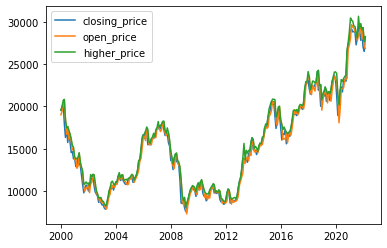

In [68]:
t = df.date
for i in range(1,4):
    y = df.iloc[:, i]
    plt.plot(t,y, label=df.columns[i])
plt.legend()
plt.show()

In [69]:
#予測
m = Prophet(seasonality_mode="multiplicative")
df_closing = df[["date", "closing_price"]].rename(columns={"date":"ds", "closing_price":"y"})
m.fit(df_closing)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -15.7648
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       490.018    0.00702188       82.8067     0.06965           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102       490.241    0.00540039       84.8837   6.108e-05       0.001      182  LS failed, Hessian reset 
     158       490.692    0.00036046       72.1399    3.93e-06       0.001      293  LS failed, Hessian reset 
     199       490.711   2.40917e-05       80.6129           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       491.415   0.000209456       78.9012           1           1      483   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     311       491.441   8.52599e-05       75.6972   1.264e-06       0.001      536  LS failed, Hessian rese

/Users/harusaku/Desktop/HaitLab/Stock_price_prediction_app/.env/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     88.2881       5.136      0.5136      652   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     406       491.528   0.000193094       98.8949     2.1e-06       0.001      697  LS failed, Hessian reset 
     463        491.54   4.51003e-09       78.9282      0.1331      0.1331      775   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


In [70]:
future = m.make_future_dataframe(periods=120, freq="MS")
future.tail()

,ds
382,2031-11-01
383,2031-12-01
384,2032-01-01
385,2032-02-01
386,2032-03-01


In [71]:
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

/Users/harusaku/Desktop/HaitLab/Stock_price_prediction_app/.env/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/harusaku/Desktop/HaitLab/Stock_price_prediction_app/.env/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
382,2031-11-01,43344.796925,39113.112683,47300.147132
383,2031-12-01,43564.239440,39094.002624,47467.560220
384,2032-01-01,43554.092052,39334.511032,47703.836332
385,2032-02-01,42951.945255,38983.244572,47161.018133
386,2032-03-01,43191.134081,38932.622454,47176.943705


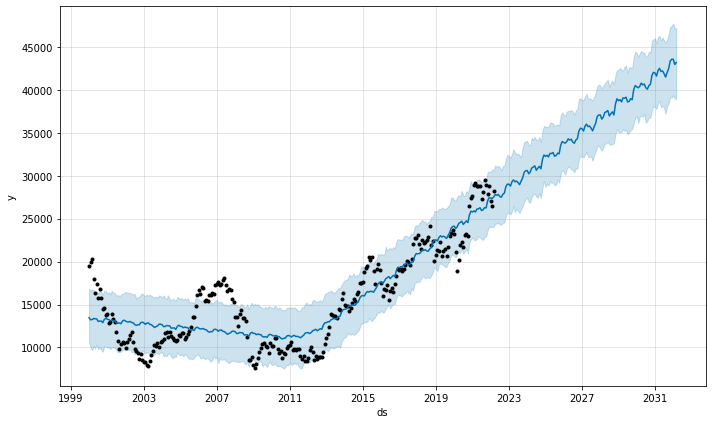

In [72]:
fig1 = m.plot(forecast)

/Users/harusaku/Desktop/HaitLab/Stock_price_prediction_app/.env/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


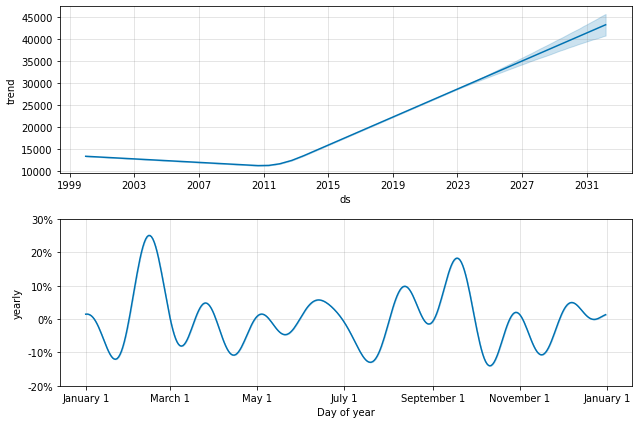

In [73]:
fig2 = m.plot_components(forecast)